In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [86]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [ ]:
#In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved. Both precision and recall are therefore based on an understanding and measure of relevance.

#Suppose a computer program for recognizing dogs in photographs identifies 8 dogs in a picture containing 12 dogs and some cats. Of the 8 identified as dogs, 5 actually are dogs (true positives), while the rest are cats (false positives). The program's precision is 5/8 while its recall is 5/12. When a search engine returns 30 pages only 20 of which were relevant while failing to return 40 additional relevant pages, its precision is 20/30 = 2/3 while its recall is 20/60 = 1/3. So, in this case, precision is "how useful the search results are", and recall is "how complete the results are".

In [6]:
df= pd.read_csv('C:/Users/shank/Desktop/Python/diabetes.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 0, 'Age')

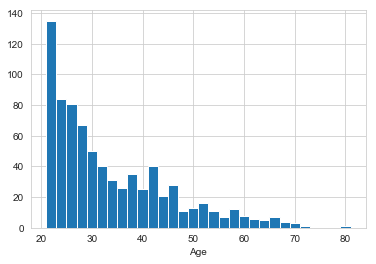

In [15]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

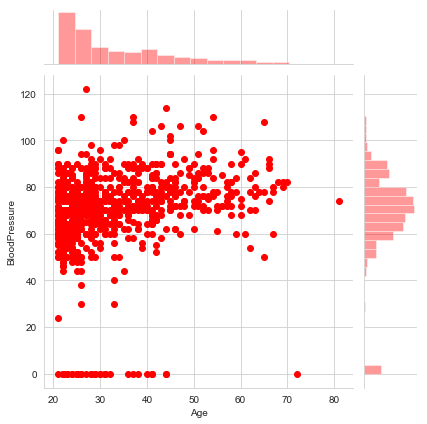

In [19]:
#sns.jointplot(data=df,x='Age',y='BMI',color='')
sns.jointplot(x='Age',y='BloodPressure',data=df,color='red',kind='scatter');

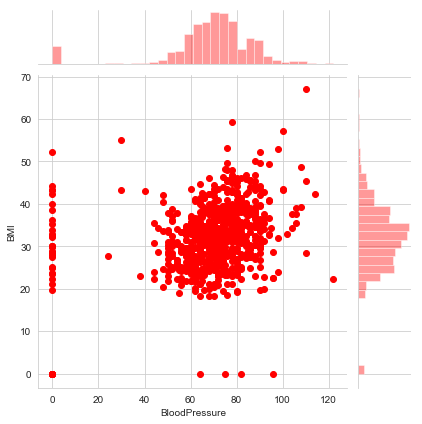

In [24]:
#sns.jointplot(data=df,x='Age',y='BMI',color='')
sns.jointplot(x='BloodPressure',y='BMI',data=df,color='red',kind='scatter');

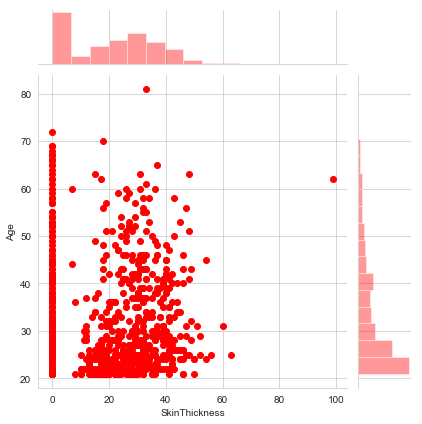

In [29]:
#sns.jointplot(data=df,x='Age',y='BMI',color='')
sns.jointplot(x='SkinThickness',y='Age',data=df,color='red',kind='scatter');

In [30]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


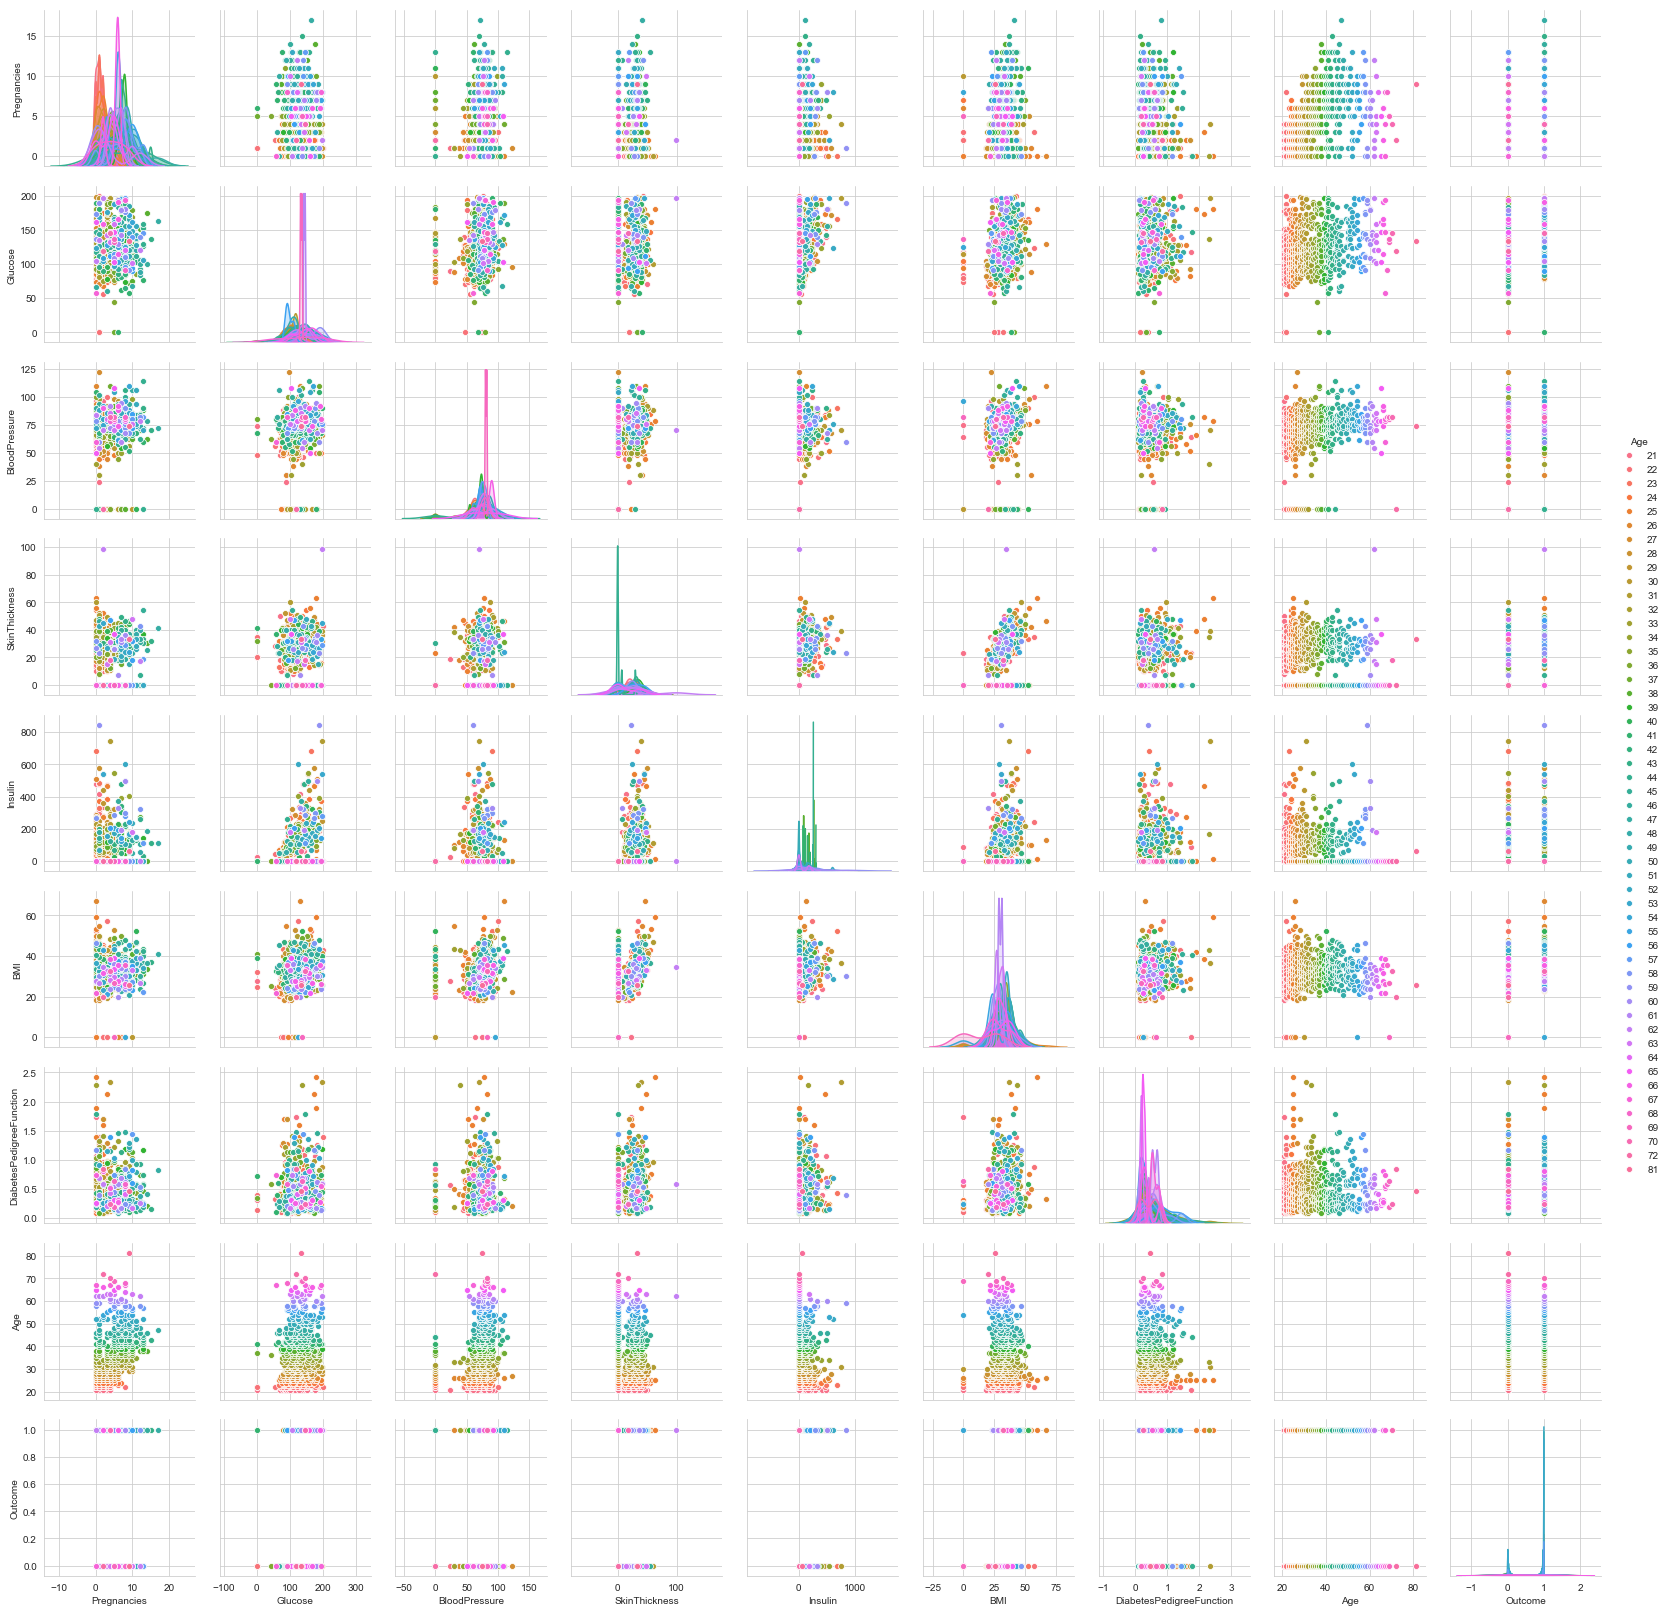

In [58]:
sns.pairplot(df,hue='Age')

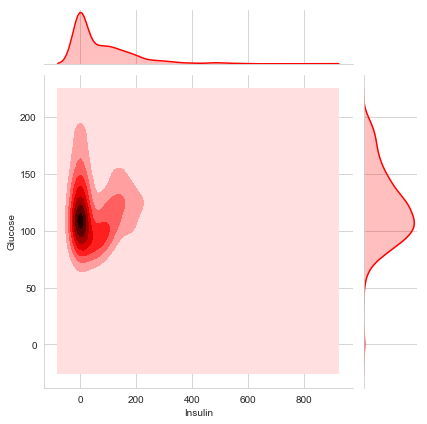

In [34]:
#sns.jointplot(data=df,x='Age',y='BMI',color='')
sns.jointplot(x='Insulin',y='Glucose',data=df,color='red',kind='kde');

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), df['Outcome'],test_size=0.25, random_state=0)


In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

   micro avg       0.81      0.81      0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



In [53]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [54]:
#( TP + TN ) / Total = 100 + 50 / 165 = 0.91
#tp / (tp + fp)
print(119/(119+26))

0.25390625
0.8206896551724138


In [55]:
#( TP + TN ) / Total = 100 + 50 / 165 = 0.91
#tp / (tp + fn)
print(119/(119+11))

0.9153846153846154


Text(0.5, 16.0, 'Predicted label')

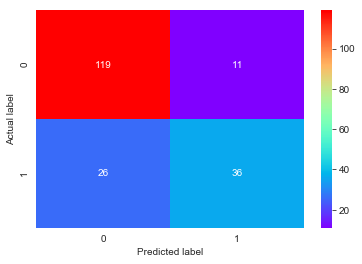

In [59]:
sns.heatmap(cnf_matrix, annot=True, cmap="rainbow" ,fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
auc = metrics.roc_auc_score(y_test, predictions)
print(auc*100)

74.80148883374689


In [69]:
y_test.head(5)

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

In [65]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [70]:
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
X_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted Value,Actual Y value,Predicted OutCome,Actual Y Outcome
661,1,199,76,43,0,42.9,1.394,22,1,1,Patient Is Diabetic,Patient Is Diabetic
122,2,107,74,30,100,33.6,0.404,23,0,0,Patient Is Not Diabetic,Patient Is Not Diabetic
113,4,76,62,0,0,34.0,0.391,25,0,0,Patient Is Not Diabetic,Patient Is Not Diabetic
14,5,166,72,19,175,25.8,0.587,51,1,1,Patient Is Diabetic,Patient Is Diabetic
529,0,111,65,0,0,24.6,0.660,31,0,0,Patient Is Not Diabetic,Patient Is Not Diabetic


In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 661 to 463
Data columns (total 11 columns):
Pregnancies                 192 non-null int64
Glucose                     192 non-null int64
BloodPressure               192 non-null int64
SkinThickness               192 non-null int64
Insulin                     192 non-null int64
BMI                         192 non-null float64
DiabetesPedigreeFunction    192 non-null float64
Age                         192 non-null int64
Predicted Value             192 non-null int64
Actual Y value              192 non-null int64
Predicted OutCome           192 non-null int64
dtypes: float64(2), int64(9)
memory usage: 23.0 KB


In [112]:
def impute_age(cols):
    #Age = cols[0]
    POut = cols[0]
   # print (POut)  
    if POut == 1:
           return 'Patient Is Diabetic'
    else:
           return 'Patient Is Not Diabetic'


In [113]:
X_test['Predicted OutCome'] = X_test[['Predicted Value']].apply(impute_age,axis=1)

In [115]:
X_test['Actual Y Outcome'] = X_test[['Actual Y value']].apply(impute_age,axis=1)

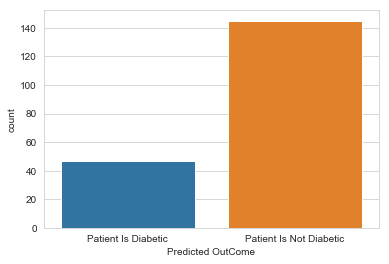

In [118]:
sns.countplot(x='Predicted OutCome',data=X_test)

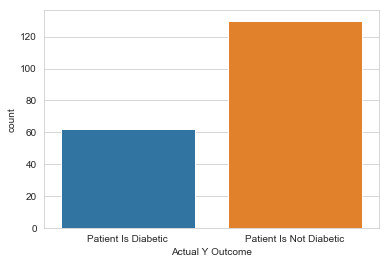

In [119]:
sns.countplot(x='Actual Y Outcome',data=X_test)

In [87]:
X_test.iplot(kind='bar',x='Actual Y value')

In [117]:
X_test.to_csv(r'C:\Users\shank\Desktop\Knowledge\Python Training\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\Output.csv', index = False)

In [78]:
X_test['Actual Y value'] = y_test